In [68]:
import csv
import tensorflow as tf
import os
import numpy as np

from sklearn.model_selection import train_test_split

RANDOM_SEED = 42


In [69]:
dataset_orb = 'preprocess/norm_features_orb.csv'


model_orb_save = 'model/model_orb.keras'

In [70]:
NUM_CLASSES = 26

In [71]:
X_dataset = np.loadtxt(dataset_orb, delimiter=',', dtype='float32', usecols=list(range(1, (32*100) + 43)))
y_dataset = np.loadtxt(dataset_orb, delimiter=',', dtype=np.int32, usecols=(0))


/var/folders/kd/rkdh2ckn6y313ps39rr1p3p80000gn/T/ipykernel_11648/3881550305.py:2: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  y_dataset = np.loadtxt(dataset_orb, delimiter=',', dtype=np.int32, usecols=(0))


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((3242, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [74]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_15 (Dropout)        (None, 3242)              0         
                                                                 
 dense_20 (Dense)            (None, 1024)              3320832   
                                                                 
 dropout_16 (Dropout)        (None, 1024)              0         
                                                                 
 dense_21 (Dense)            (None, 256)               262400    
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                16448     
                                                                 
 dense_23 (Dense)            (None, 26)               

In [75]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_orb_save, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [76]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [77]:
history = model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
10/10 [==============================] - ETA: 0s - loss: 253.1030 - accuracy: 0.0441
Epoch 1: saving model to model_orb.keras
10/10 [==============================] - 1s 49ms/step - loss: 253.1030 - accuracy: 0.0441 - val_loss: 3.4242 - val_accuracy: 0.0355
Epoch 2/1000
 9/10 [==========================>...] - ETA: 0s - loss: 57.0926 - accuracy: 0.0417
Epoch 2: saving model to model_orb.keras
10/10 [==============================] - 1s 54ms/step - loss: 56.2003 - accuracy: 0.0407 - val_loss: 3.2583 - val_accuracy: 0.0558
Epoch 3/1000
 8/10 [=======================>......] - ETA: 0s - loss: 13.9243 - accuracy: 0.0518
Epoch 3: saving model to model_orb.keras
10/10 [==============================] - 0s 40ms/step - loss: 13.1534 - accuracy: 0.0542 - val_loss: 3.2582 - val_accuracy: 0.0558
Epoch 4/1000
 9/10 [==========================>...] - ETA: 0s - loss: 6.4498 - accuracy: 0.0486
Epoch 4: saving model to model_orb.keras
10/10 [==============================] - 0s 46ms/step 

In [78]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 [==============================] - 0s 8ms/step - loss: 3.2527 - accuracy: 0.0558


In [79]:
model = tf.keras.models.load_model(model_orb_save)

In [80]:

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 67ms/step
[0.04764858 0.03490369 0.04044801 0.04207651 0.03999422 0.04177794
 0.03291416 0.02830097 0.0480682  0.04247703 0.03678803 0.04202227
 0.03721198 0.04148838 0.03226446 0.02975053 0.03605696 0.03717893
 0.04539964 0.03446297 0.03610697 0.03828355 0.03594423 0.04393257
 0.03326809 0.04123119]
8


13/13 [==============================] - 0s 3ms/step


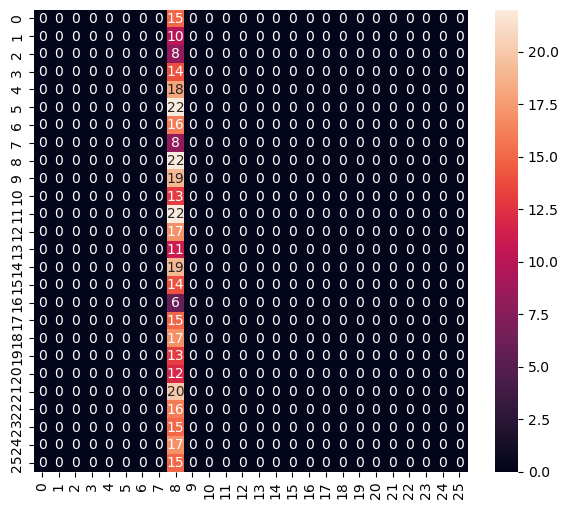

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00        22
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00         8
           8       0.06      1.00      0.11        22
           9       0.00      0.00      0.00        19
          10       0.00      0.00      0.00        13
          11       0.00      0.00      0.00        22
          12       0.00      0.00      0.00        17
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00        19
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00         6
     

/Users/matt-os/anaconda3/envs/deep-learning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matt-os/anaconda3/envs/deep-learning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matt-os/anaconda3/envs/deep-learning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [82]:
model.save(model_orb_save)

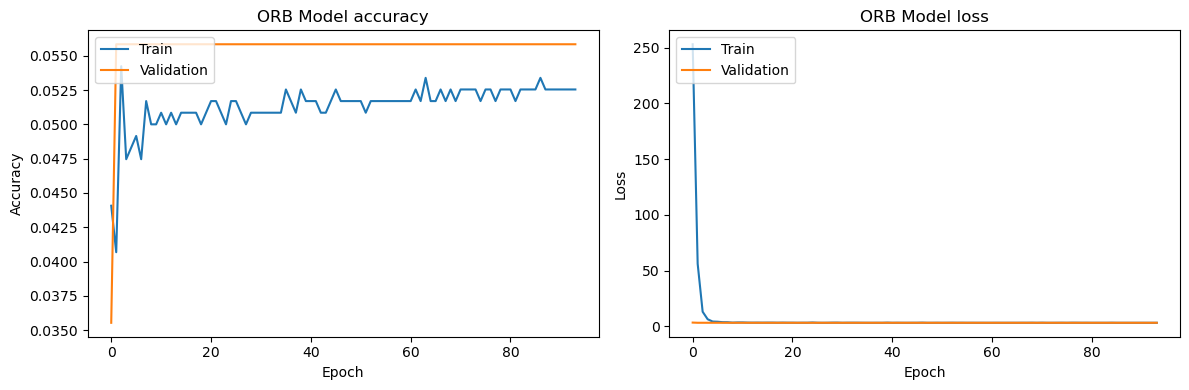

In [84]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ORB Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ORB Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()